In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import sqlite3 as sq

# Reading data from Sqlite Database

In [3]:
con = sq.connect('database.sqlite')

In [4]:
con

In [5]:
df = pd.read_sql_query('SELECT * FROM REVIEWS', con)

In [6]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


## Data Preparation

In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
( df.HelpfulnessNumerator > df.HelpfulnessDenominator).value_counts()

False    568452
True          2
Name: count, dtype: int64

In [9]:
df[df.HelpfulnessNumerator > df.HelpfulnessDenominator]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [10]:
df_valid = df[df.HelpfulnessNumerator <= df.HelpfulnessDenominator]

In [11]:
df_valid

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


##### No duplicate value if we check the whole table, but we can say that the rows will be duplicate if 2 or more people have same userid, profilename, text and messaged at the same time, therefore we pass that as the 4 columns to duplicated() function to check if there is any duplicate values, and if there is then we will remove them

In [12]:
df_valid.duplicated().sum()

0

In [13]:
df_valid.duplicated(['UserId','ProfileName','Time','Text']).sum()

174521

In [14]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [15]:
data = df_valid.drop_duplicates(['UserId','ProfileName','Time','Text'])

In [16]:
data.shape

(393931, 10)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393931 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393931 non-null  int64 
 1   ProductId               393931 non-null  object
 2   UserId                  393931 non-null  object
 3   ProfileName             393931 non-null  object
 4   HelpfulnessNumerator    393931 non-null  int64 
 5   HelpfulnessDenominator  393931 non-null  int64 
 6   Score                   393931 non-null  int64 
 7   Time                    393931 non-null  int64 
 8   Summary                 393931 non-null  object
 9   Text                    393931 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.1+ MB


##### From the data.info(), we see that Time is of int datatype instead of datetime

In [18]:
data.Time

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [19]:
data.Time = pd.to_datetime(data.Time, unit= 's')

/var/folders/3p/4th44wfd15g92zp4d9y14zk40000gn/T/ipykernel_665/3513575675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Time = pd.to_datetime(data.Time, unit= 's')


In [20]:
data.Time

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

### Analyse to what user, Amazon can recommend more product

In [21]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [22]:
data.UserId.nunique()

256059

In [23]:
data.groupby(['UserId']).agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'})

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [24]:
rec_df = data.groupby(['UserId']).agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'}).sort_values(by = 'ProductId', ascending=False)

In [25]:
rec_df.columns = ['Number_of_summaries','num_text','avg_score','No_of_prods_puchased']

In [26]:
rec_df

,Number_of_summaries,num_text,avg_score,No_of_prods_puchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [27]:
rec_df.index[:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [28]:
rec_df.No_of_prods_puchased[:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118])

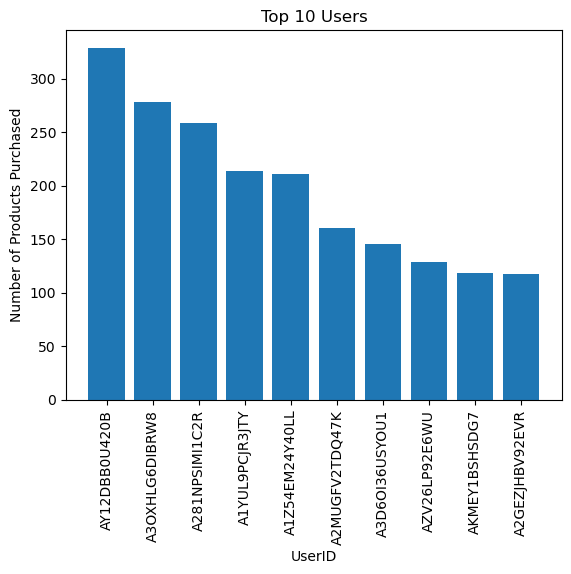

In [29]:
plt.bar(rec_df.index[:10], rec_df.No_of_prods_puchased[:10].values)
plt.title('Top 10 Users')
plt.xticks(rotation='vertical')
plt.xlabel('UserID')
plt.ylabel('Number of Products Purchased')
plt.show()


##### Which Product has good number of reviews?

In [30]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [31]:
# data.groupby(['ProductId']).agg({'Summary':'count'}).sort_values(by='Summary',ascending=False)
prod_count = data.ProductId.value_counts().to_frame()

In [32]:
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1


In [33]:
prod_count[prod_count['count']>500]

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [34]:
freq_prod_ids = prod_count[prod_count['count']>500].index

In [35]:
freq_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [36]:
freq_prod_df = data[data.ProductId.isin(freq_prod_ids)]

In [37]:
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


<Axes: xlabel='count', ylabel='ProductId'>

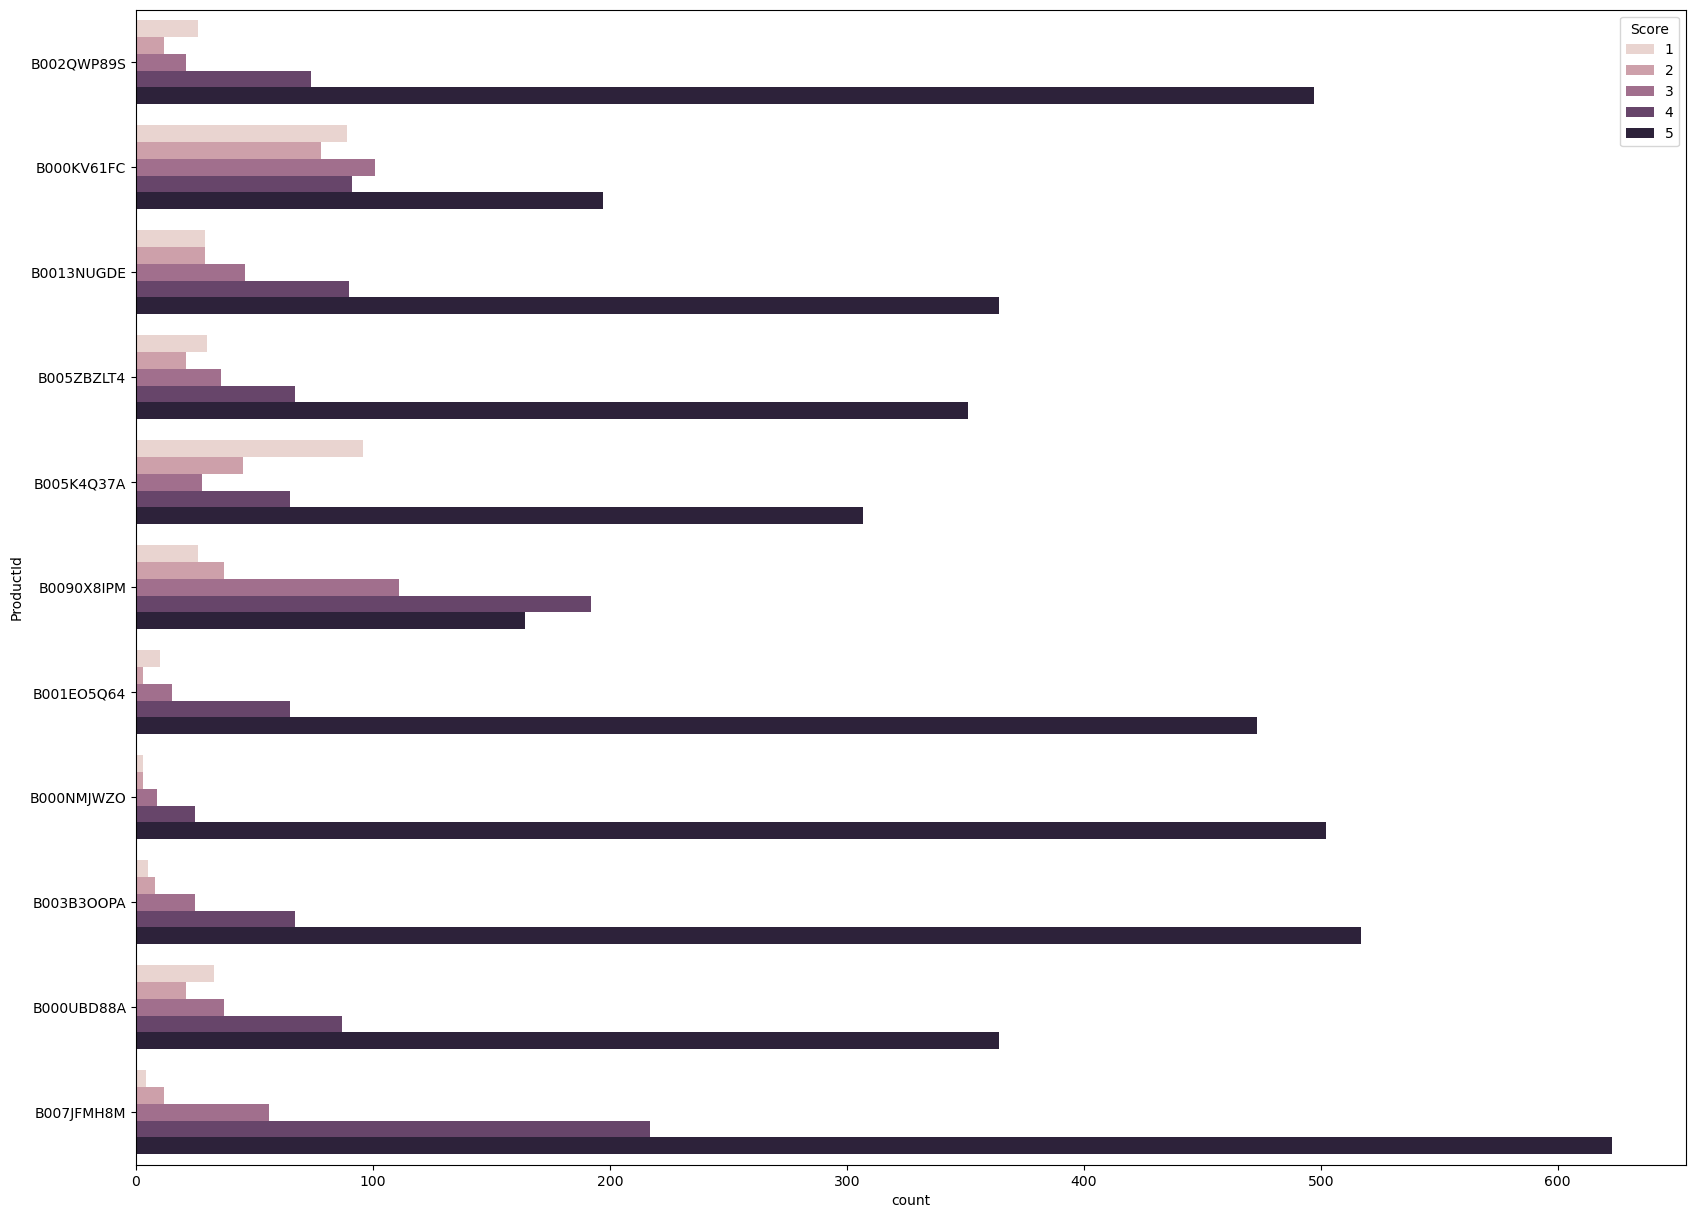

In [38]:
plt.figure(figsize=(20,15))
sns.countplot(data = freq_prod_df, y='ProductId',hue='Score')

##### Is there any difference between behaviour of frequent viewers and not frequent viewers?

In [39]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [40]:
x = data.UserId.value_counts()

In [41]:
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [42]:
data['viewer_type']=data.UserId.apply(lambda user: "Frequent" if x[user]>50 else "Not Frequent")

/var/folders/3p/4th44wfd15g92zp4d9y14zk40000gn/T/ipykernel_665/3348156831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['viewer_type']=data.UserId.apply(lambda user: "Frequent" if x[user]>50 else "Not Frequent")


In [43]:
data.viewer_type.value_counts()

viewer_type
Not Frequent    384573
Frequent          9358
Name: count, dtype: int64

In [44]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent


In [67]:
freq, not_freq= data[data.viewer_type=='Frequent'], data[data.viewer_type=='Not Frequent']

In [47]:
not_freq

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent


<Axes: xlabel='Score'>

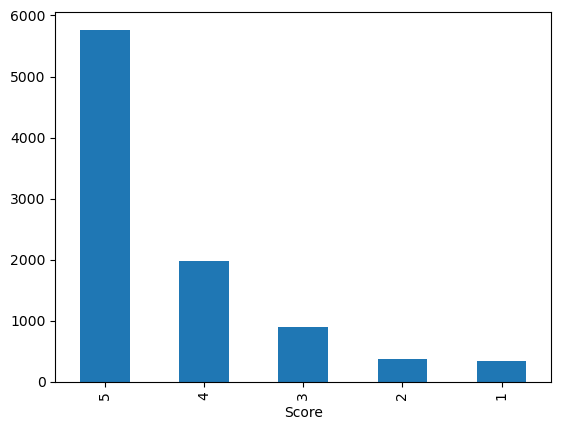

In [48]:
freq.Score.value_counts().plot(kind='bar')

<Axes: xlabel='Score'>

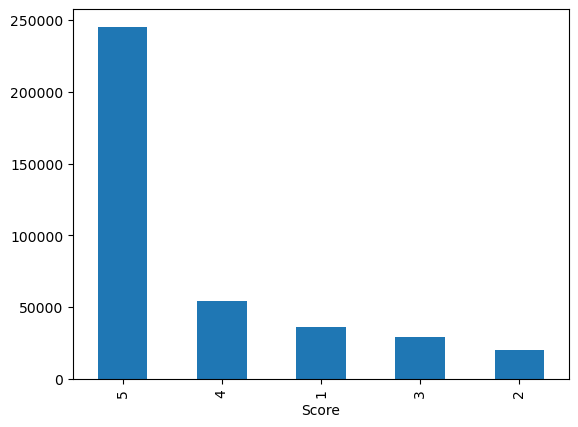

In [49]:
not_freq.Score.value_counts().plot(kind='bar')

##### Are frequent users more verbose?

In [50]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [52]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [53]:
data.Text

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [59]:
data[['UserId', 'ProductId', 'Text', 'viewer_type']]

16

In [60]:
data.Text[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [61]:
data.Text[0].split(' ')

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [62]:
len(data.Text[0].split(' '))

49

In [64]:
def calc_length(text):
    return len(text.split(' '))

In [65]:
data['text_length'] = data.Text.apply(calc_length)

/var/folders/3p/4th44wfd15g92zp4d9y14zk40000gn/T/ipykernel_665/4243476801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_length'] = data.Text.apply(calc_length)


In [66]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent,37


In [68]:
freq_data, not_freq_data= data[data.viewer_type=='Frequent'], data[data.viewer_type=='Not Frequent']

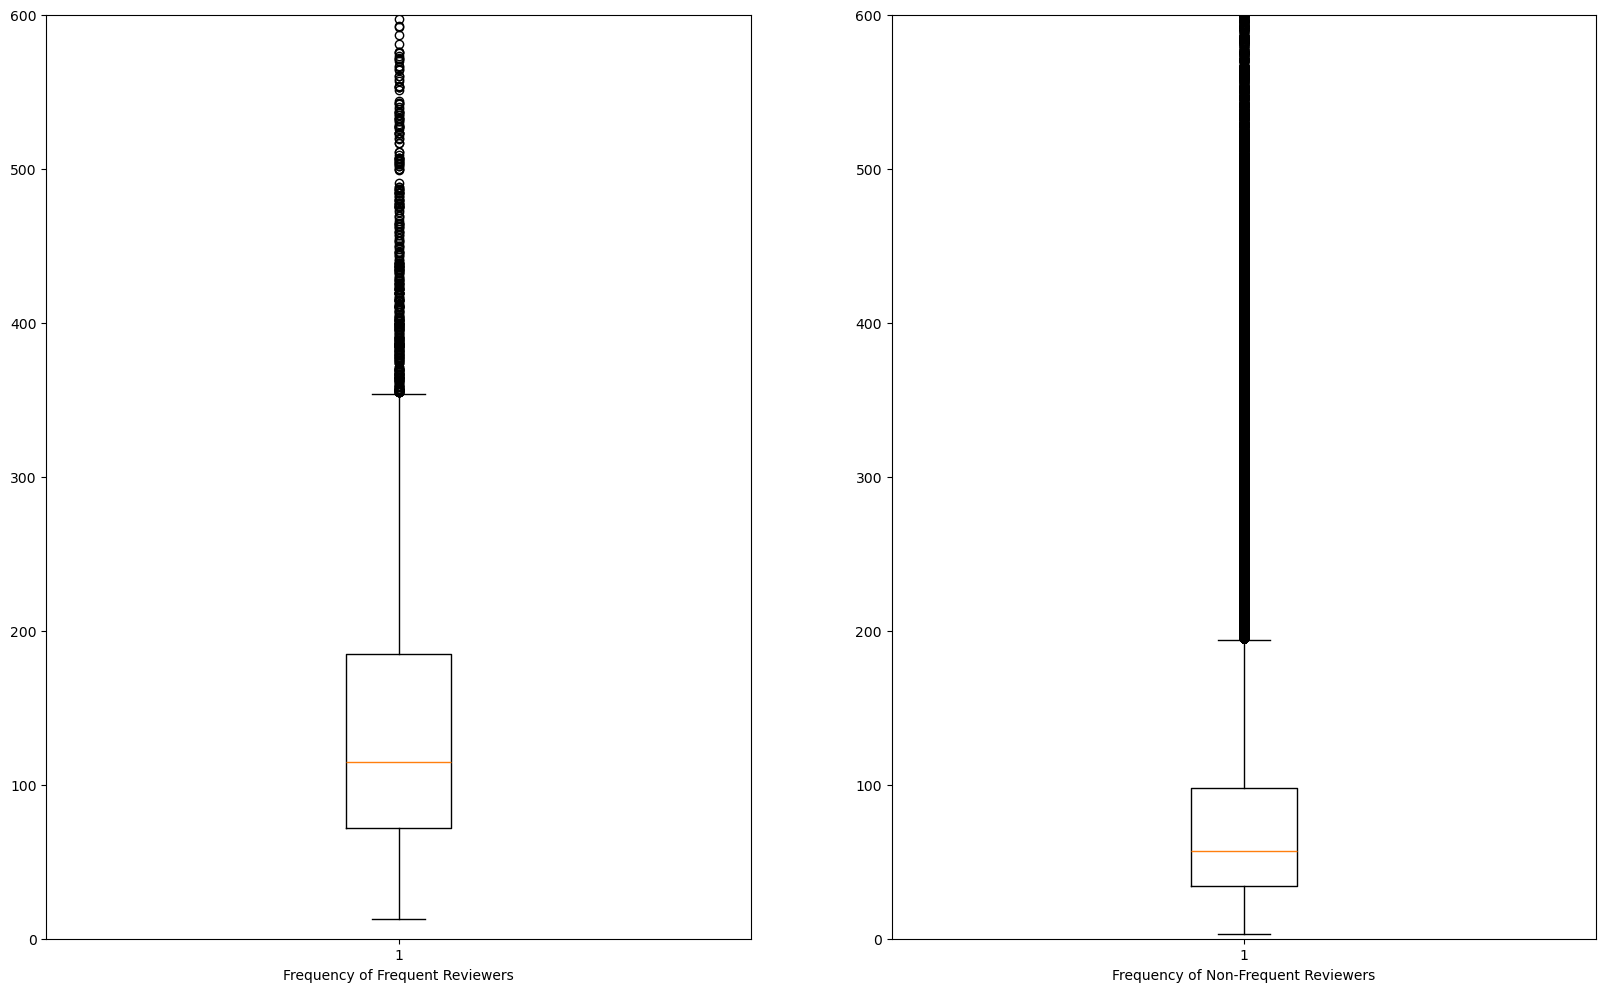

In [83]:
fig = plt.figure(figsize = (20,12))


ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data.text_length)
ax1.set_xlabel('Frequency of Frequent Reviewers')
ax1.set_ylim(0,600)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data.text_length)
ax2.set_xlabel('Frequency of Non-Frequent Reviewers')
ax2.set_ylim(0,600)

plt.show()

### Sentiment Analysis

In [85]:
from textblob import TextBlob

In [113]:
data.Text[3]

'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.'

In [111]:
TextBlob(data.Text[3]).sentiment.polarity

0.16666666666666666

In [91]:
data.shape

(393931, 12)

##### As Sentiment Analysis takes alot of resources and the data itself is quite huge, we will take only a sample of data

In [94]:
sample = data[:50000]

In [101]:
polarity = []
for text in sample.Summary:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

##### This worked perfectly fine but some text may contain some blank or missing values, so it will return some exception, so we will use exception handling

In [102]:
len(polarity)

50000

In [103]:
sample['polarity'] = polarity

/var/folders/3p/4th44wfd15g92zp4d9y14zk40000gn/T/ipykernel_665/4182253960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['polarity'] = polarity


In [104]:
sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.700000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.000000
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.000000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54249,54250,B001H0FI22,A3G7BEJJCPD6DS,LuxuryReading,1,1,4,2009-05-20,My 2nd Favorite,This is my 2nd favorite Nescafe drink after th...,Not Frequent,62,0.250000
54250,54251,B001H0FI22,AM8W6Y3HVXLZT,"D. P. Schroeder ""Paukenwirbel""",3,4,4,2009-05-11,Best of 5 flavors available,This flavor is by far the best of the 5 flavor...,Not Frequent,80,0.700000
54251,54252,B001H0FI22,AEWYUPCNDV7HY,Modern Blue Argonaut,2,3,2,2009-04-21,Just not very good!,If you enjoy making cappuccino's with your Dol...,Not Frequent,217,-0.336538
54252,54253,B001H0FI22,AROBCX5WMM863,toni t haugen,0,0,4,2012-10-24,pricey but good.,"the cappuccino is very good, but because there...",Not Frequent,59,0.700000


In [106]:
sample.Text[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [125]:
sample.groupby(['polarity']).size()

polarity
-1.000000     515
-0.976562       2
-0.975000      26
-0.953674       1
-0.937500      12
             ... 
 0.958333       1
 0.975000      11
 0.976562      85
 0.988281       1
 1.000000    6976
Length: 1524, dtype: int64

In [127]:
(sample.polarity>0).value_counts()

polarity
True     29155
False    20845
Name: count, dtype: int64

In [147]:
pos, neg = sample[sample.polarity>0], sample[sample.polarity<0]

In [148]:
pos

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.700000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.800000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...,Not Frequent,72,0.600000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Not Frequent,53,0.358333
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,2012-05-03,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,Not Frequent,28,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54248,54249,B001H0FI22,AL6U52M47C5YV,Stephen M. Vakil,1,1,5,2009-05-22,My favorite nescafe dolce flavor,This is my favorite type of cap for the dolce ...,Not Frequent,85,0.500000
54249,54250,B001H0FI22,A3G7BEJJCPD6DS,LuxuryReading,1,1,4,2009-05-20,My 2nd Favorite,This is my 2nd favorite Nescafe drink after th...,Not Frequent,62,0.250000
54250,54251,B001H0FI22,AM8W6Y3HVXLZT,"D. P. Schroeder ""Paukenwirbel""",3,4,4,2009-05-11,Best of 5 flavors available,This flavor is by far the best of the 5 flavor...,Not Frequent,80,0.700000
54252,54253,B001H0FI22,AROBCX5WMM863,toni t haugen,0,0,4,2012-10-24,pricey but good.,"the cappuccino is very good, but because there...",Not Frequent,59,0.700000


In [149]:
neg

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,text_length,polarity
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,2012-09-20,poor taste,I love eating them and they are good for watch...,Not Frequent,42,-0.400000
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Not Frequent,22,-1.000000
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,2012-05-05,How can you go wrong!,"It is chocolate, what can I say. Great variet...",Not Frequent,36,-0.625000
61,62,B004N5KULM,A7ZK2A3VIW7X9,Peggy,0,2,5,2011-10-24,pretty expensive,"This bag of candy online is pretty expensive, ...",Not Frequent,30,-0.125000
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,2008-07-06,stale product.,Arrived in 6 days and were so stale i could no...,Not Frequent,17,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54185,54186,B001D0FT0C,ARS0COV4PYKLF,toddler mom,0,0,1,2012-05-10,Horrible,"ProFlowers sent the flowers to ME, the buyer. ...",Not Frequent,31,-1.000000
54186,54187,B001D0FT0C,AOQ5WRZT9OKGJ,D. M. Castro,7,11,1,2012-02-14,Horrible idea,Ordered these to be delivered on the tenth of ...,Not Frequent,152,-1.000000
54191,54192,B004OVICTW,ALX6CSFZ6Z5XD,LizzieW,0,0,1,2011-10-06,STALE,This coffee and another WP variety that I ord...,Not Frequent,44,-0.500000
54212,54213,B0000TLRIA,A1UR9Y284SMTH7,SUZANNE G,0,0,2,2012-08-05,Disappointed,I ordered this because I ran out of another br...,Not Frequent,62,-0.750000


In [153]:
from collections import Counter as ctr

In [154]:
ctr(pos.Summary).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

In [155]:
ctr(neg.Summary).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]